In [2]:
import pandas as pd
import numpy as np
#%%  import data

data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace = True)

In [3]:
# %%
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
#%% normalization

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [4]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [29]:
#%% decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("decision tree score: ", dt.score(x_test,y_test))

decision tree score:  0.9186046511627907


In [33]:
#%%  random forest
for i in range(10,101):

    rf = RandomForestClassifier(n_estimators = i,random_state = 1,criterion='entropy')
    rf.fit(x_train,y_train)
    print("{} random forest algo result: ".format(i),rf.score(x_test,y_test))

10 random forest algo result:  0.9534883720930233
11 random forest algo result:  0.9534883720930233
12 random forest algo result:  0.9534883720930233
13 random forest algo result:  0.9534883720930233
14 random forest algo result:  0.9534883720930233
15 random forest algo result:  0.9534883720930233
16 random forest algo result:  0.9534883720930233
17 random forest algo result:  0.9534883720930233
18 random forest algo result:  0.9534883720930233
19 random forest algo result:  0.9534883720930233
20 random forest algo result:  0.9534883720930233
21 random forest algo result:  0.9534883720930233
22 random forest algo result:  0.9534883720930233
23 random forest algo result:  0.9534883720930233
24 random forest algo result:  0.9534883720930233
25 random forest algo result:  0.9534883720930233
26 random forest algo result:  0.9534883720930233
27 random forest algo result:  0.9534883720930233
28 random forest algo result:  0.9534883720930233
29 random forest algo result:  0.9534883720930233


In [36]:
y_pred= rf.predict(x_test)  

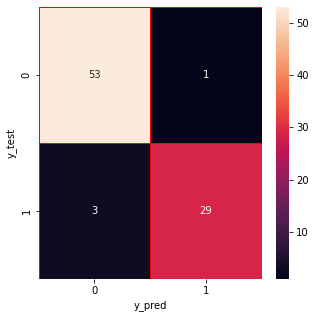

In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


#cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()